In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import io
import requests
import urllib

In [2]:
df=pd.read_csv('used_cars.csv')
cd = df[['price','mileage','color']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000
cd.head()

,price,mileage,color
0,43.995,36.858,Silver
1,44.995,46.883,Black
2,25.999,108.759,White
3,33.880,35.187,Black
4,34.895,48.153,Black


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cd, random_state=42, test_size=0.25)
print(train.shape)
print(test.shape)

(750, 3)
(250, 3)


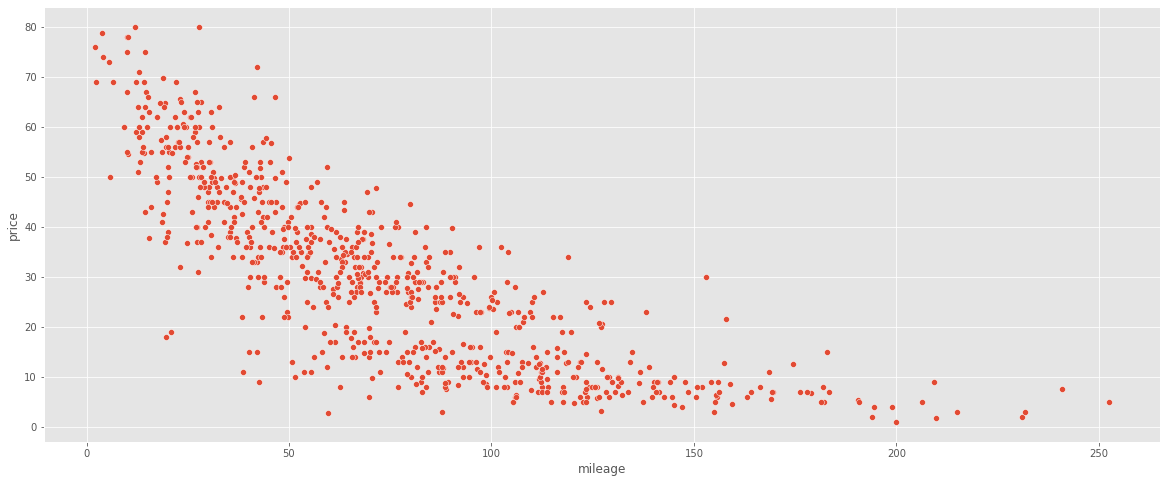

In [4]:
sns.scatterplot(x=train['mileage'], y=train['price']);

## Apply Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model=LinearRegression()

model.fit(train[['mileage']], train['price'])

LinearRegression()

In [7]:
pred=model.predict(test[['mileage']])

In [26]:
t=test['price'].reset_index().drop('index', axis=1)
p=pd.Series(pred, name='prediction')

df_2=t.merge(p,left_index=True, right_index=True)
df_2

,price,prediction
0,25.873,26.096839
1,38.980,31.975136
2,21.494,20.127342
3,11.777,17.207208
4,6.995,0.625008
...,...,...
245,24.750,22.828390
246,44.799,37.441510
247,13.995,31.264705
248,40.788,39.337561


<AxesSubplot:xlabel='prediction', ylabel='price'>

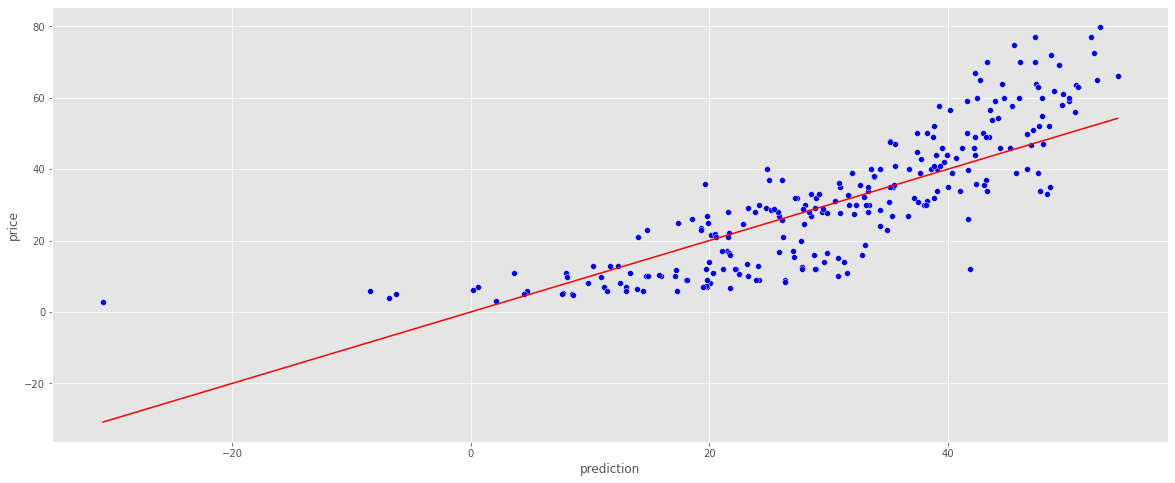

In [27]:
sns.scatterplot(x=df_2['prediction'], y=df_2['price'], color='b')
sns.lineplot(df_2['prediction'],df_2['prediction'],color='r')

In [9]:
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(test['price'],pred))

10.610348261994487

## Effect of Color on Price

In [37]:
train_2=pd.get_dummies(train ,drop_first=True).drop('price', axis=1)
test_2=pd.get_dummies(test, drop_first=True).drop('price', axis=1)

In [39]:
model=LinearRegression()
model.fit(train_2, train['price'])

LinearRegression()

In [40]:
pred_2=model.predict(test_2)

Text(0, 0.5, 'predictions using mileage and color')

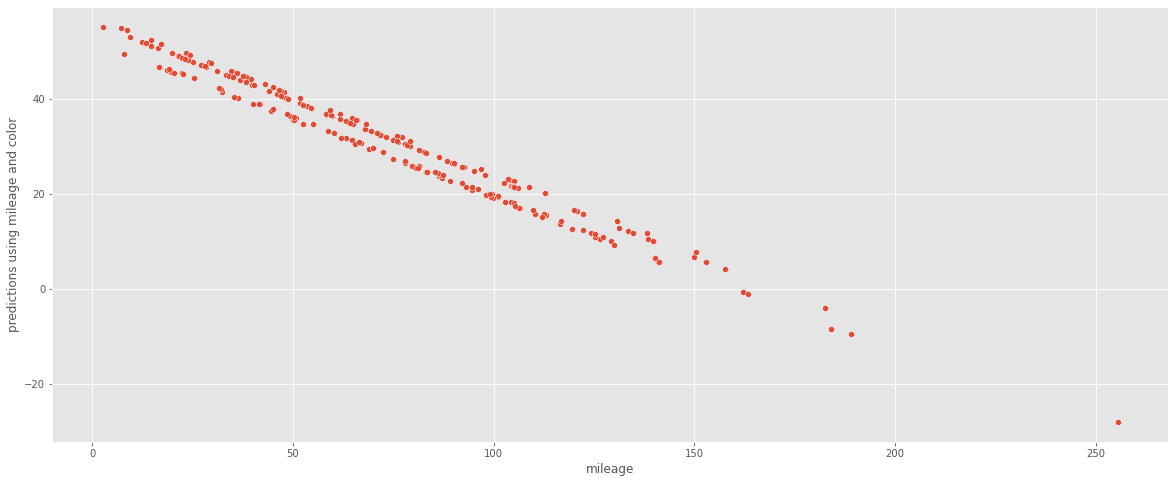

In [44]:
sns.scatterplot(x=test['mileage'], y=pred_2)
plt.xlabel('mileage'); plt.ylabel('predictions using mileage and color')

In [45]:
math.sqrt(mean_squared_error(test['price'],pred_2))

# slighly less then when using just mileage

10.361050497968531

## Log Transform

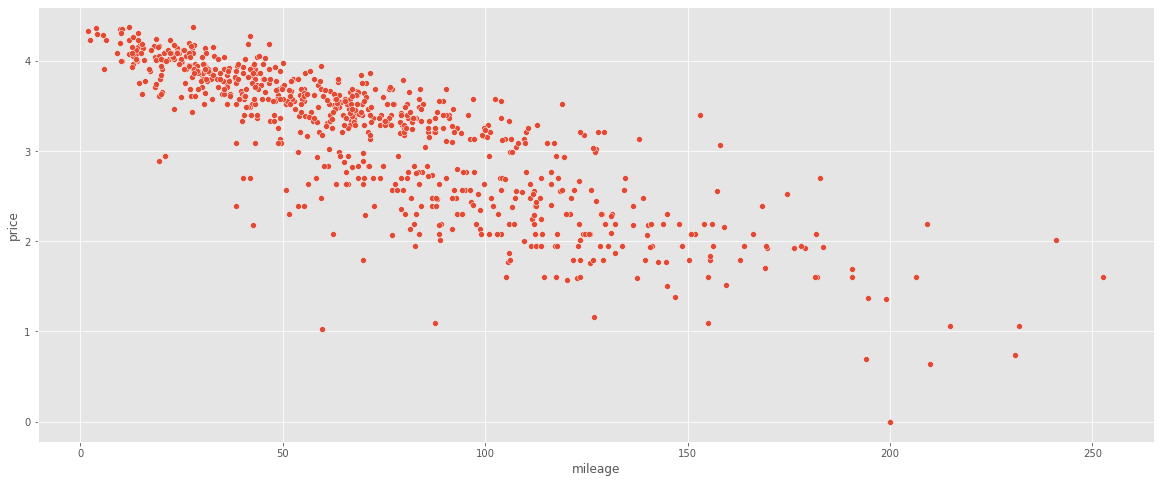

In [46]:
log_price = np.log(train['price'])
sns.scatterplot(train['mileage'],log_price);

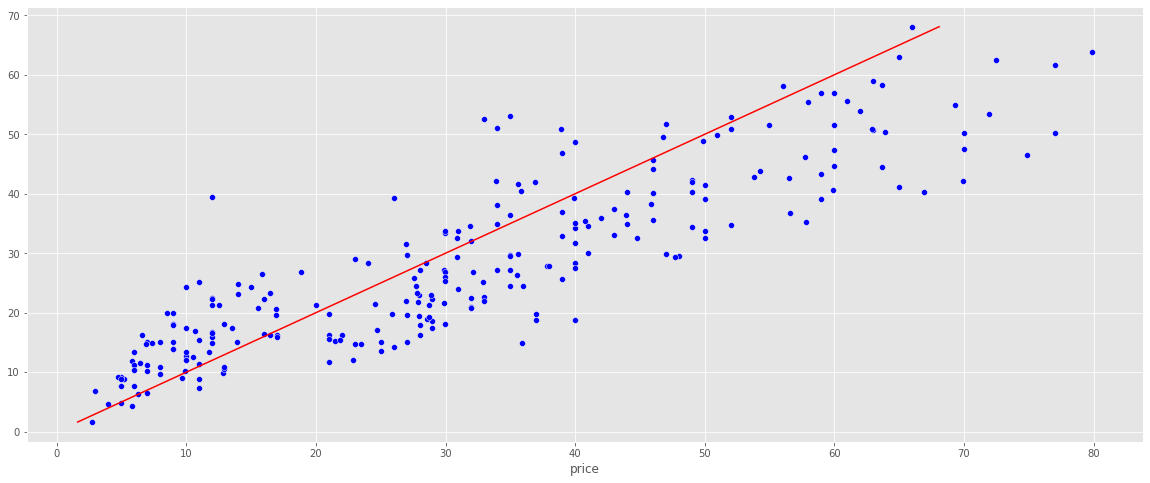

In [53]:
model = LinearRegression(fit_intercept=True)
model.fit(train[['mileage']],log_price)

pred_3 = model.predict(test[['mileage']])
pred_3 = np.exp(pred_3)
sns.scatterplot(test['price'],pred_3, color='b')
sns.lineplot(pred_3,pred_3,color='r');

## Quadratic Term

Text(0, 0.5, 'price')

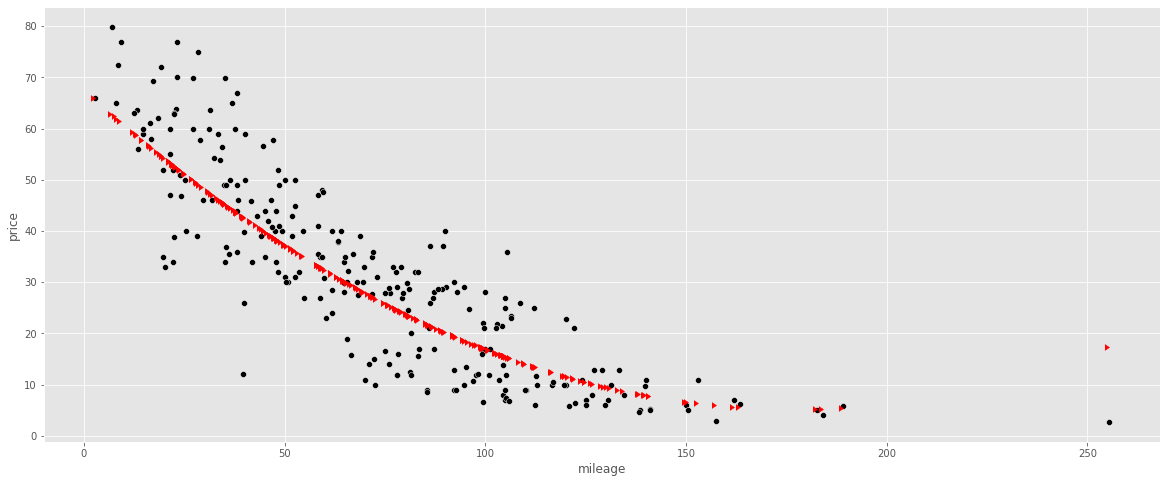

In [69]:
quad_train = np.column_stack([train['mileage'],train['mileage']**2])
quad_test = np.column_stack([test['mileage'],test['mileage']**2])

model = LinearRegression()

model.fit(quad_train, train['price'])
pred_4=model.predict(quad_test)

sns.scatterplot(test['mileage'], test['price'], marker='o', color='black')
sns.scatterplot(test['mileage'], pred_4, marker=5, color='red')
plt.xlabel('mileage'); plt.ylabel('price')